In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
import molsysmt as msm
import numpy as np
from simtk import unit
import matplotlib.pyplot as plt

# Getting distances, neighbor lists and contact maps.

MolSysMT includes a very versatile method to calculate distances between points in space, atoms and/or groups of atoms. As many other methods of this multitool, the method `molsysmt.distance()` has an input argument to choose the engine in charge of getting the result. For instance, `molsysmt.distance()` currently offers two engines `MolSysMT` and `MDTraj`. At this moment only `MolSysMT` will be reported in this guide.

The different options of the method `molsysmt.distance()` will be shown, little by little, along with the following examples.

## The XYZ molecular system form

The first case, and the most simple one, is getting distances from a points distribution in space. MolSysMT accepts a molecular system form where only spatial coordinates are described, with out topological information: the `XYZ` form.

In [3]:
molecular_system = np.zeros([6,3], dtype='float64') * unit.nanometers

In [4]:
msm.get(molecular_system, target='system', form=True)

'XYZ'

The `XYZ` form accepts numpy arrays with length units of the shape $[n\_frames, n\_atoms, 3]$ or $[n\_atoms, 3]$. In case of having an array of rank 2, MolSysMT always understands $n\_frames=1$ and the first rank as the number of atoms:

In [5]:
msm.get(molecular_system, n_frames=True, n_atoms=True)

[1, 6]

Lets create a couple of `XYZ` molecular systems with more than a frame. These two systems will help us illustrate the firts distance calculations:

In [6]:
# Molecular system A with three atoms and three frames.

molecular_system_A = np.zeros([3,3,3], dtype='float64') * unit.nanometers

## First atom
molecular_system_A[0,0,:] = [0, 2, -1] * unit.nanometers
molecular_system_A[1,0,:] = [1, 2, -1] * unit.nanometers
molecular_system_A[2,0,:] = [0, 2, -1] * unit.nanometers

## Second atom
molecular_system_A[0,1,:] = [-1, 1, 1] * unit.nanometers
molecular_system_A[1,1,:] = [-1, 0, 1] * unit.nanometers
molecular_system_A[2,1,:] = [0, 0, 1] * unit.nanometers

## Third atom
molecular_system_A[0,2,:] = [-2, 0, 1] * unit.nanometers
molecular_system_A[1,2,:] = [-2, 0, 0] * unit.nanometers
molecular_system_A[2,2,:] = [-1, 1, 0] * unit.nanometers



# Molecular system B with two atoms and three frames.

molecular_system_B = np.zeros([3,2,3], dtype='float64') * unit.nanometers

## First atom of B
molecular_system_B[0,0,:] = [4, -2, 0] * unit.nanometers
molecular_system_B[1,0,:] = [5, -2, -1] * unit.nanometers
molecular_system_B[2,0,:] = [5, -2, 0] * unit.nanometers

## Second atom of B
molecular_system_B[0,1,:] = [3, 0, -1] * unit.nanometers
molecular_system_B[1,1,:] = [3, 1, 0] * unit.nanometers
molecular_system_B[2,1,:] = [4, 1, 1] * unit.nanometers

## Distance between atoms in space

### Distance between atoms of a system

The first case shows how to get the distance between all points of a system at every frame

In [7]:
distances = msm.distance(molecular_system_A)

The result is an array of rank 3. Where the first axe or rank corresponds to the number of frames and the other two, the second and third axe, accounts for the point or atom indices:

In [8]:
distances.shape

(3, 3, 3)

This way every distance between atoms at each frame is stored. Lets print out the distance between the 0-th and the 2-th atom at frame 1-th:

In [9]:
print('Distance at frame 1-th between atoms 0-th and 2-th: {}'.format(distances[1,0,2]))

Distance at frame 1-th between atoms 0-th and 2-th: 3.7416573867739413 nm


If only the distance between atoms 0-th and 2-th at every frame is required, there is no need to compute $n\_atoms x n\_atoms$ distances. The input arguments `selection_1` and `selection_2` help us to define the range of elements of the output distance matrix:

In [10]:
distances = msm.distance(molecular_system_A, selection_1=0, selection_2=2)

This time the output is an array of rank 3 with shape $[3,1,1]$. The distance for just a pair of atoms was computed for three frames:

In [11]:
distances.shape

(3, 1, 1)

In [12]:
for ii in range(3):
    print('Distance at frame {}-th between atoms 0-th and 2-th: {}'.format(ii,distances[ii,0,0]))

Distance at frame 0-th between atoms 0-th and 2-th: 3.4641016151377544 nm
Distance at frame 1-th between atoms 0-th and 2-th: 3.7416573867739413 nm
Distance at frame 2-th between atoms 0-th and 2-th: 1.7320508075688772 nm


Lets try now to get the distance between the atom 1-th and the atoms 0-th and 2-th at every frame:

In [13]:
distances = msm.distance(molecular_system_A, selection_1=1, selection_2=[0,2])

As you will guess, the output matrix is an array of rank three this time with shape $[3,1,2]$:

In [14]:
distances.shape

(3, 1, 2)

If we want now to print out the distance between atoms 1-th and 2-th for frame 0-th:

In [15]:
print('Distance at frame 0-th between atoms 1-th and 2-th: {}'.format(distances[0,0,1]))

Distance at frame 0-th between atoms 1-th and 2-th: 1.4142135623730951 nm


The position of each atom in lists `selection_1` and `selection_2` is used to locate the corresponding distance in the output array. If instead, you want to use the original atom indices to locate a distance, the input argument `output_form='dict'` can help:

In [16]:
distances = msm.distance(molecular_system_A, selection_1=1, selection_2=[0,2], output_form='dict')

This way the output is no longer a numpy array of rank 3, the output object is now a dictionary of dictionaries of dictionaries. Where the set keys of the first dictionary corresponds to the atom indices of `selection_1`:

In [17]:
distances.keys()

dict_keys([1])

The second nested dictionary has the atom indices of `selection_2` as keys:

In [18]:
distances[1].keys()

dict_keys([0, 2])

And the third and last nested dictionary is defined with the frame indices as keys:

In [19]:
distances[1][2].keys()

dict_keys([0, 1, 2])

Thus, the distance now between atoms 0-th and 2-th in frame 1-th is:

In [20]:
print('Distance at frame 0-th between atoms 1-th and 2-th: {}'.format(distances[1][2][0]))

Distance at frame 0-th between atoms 1-th and 2-th: 1.4142135623730951 nm


Just like `selection_1` and `selection_2` can limit the range of atom indices of the calculation, `frame_indices_1` can be used to define the list of frames where the method applies:

In [21]:
distances = msm.distance(molecular_system_A, selection_1=1, selection_2=[0,2], frame_indices_1=[1,2])

In [22]:
print('Distance at frame 2-th between atoms 1-th and 2-th: {}'.format(distances[1,0,1]))

Distance at frame 2-th between atoms 1-th and 2-th: 1.7320508075688772 nm


You can check again that with `output_form='dict'` the original indics for atoms and frames work to locate a distance:

In [23]:
distances = msm.distance(molecular_system_A, selection_1=1, selection_2=[0,2], frame_indices_1=[1,2], output_form='dict')

In [24]:
print('Distance at frame 2-th between atoms 1-th and 2-th: {}'.format(distances[1][2][2]))

Distance at frame 2-th between atoms 1-th and 2-th: 1.7320508075688772 nm


### Distance between atoms of two systems

The second case shows how to get the distance between atoms of two systems at every frame

In [25]:
distances = msm.distance(item_1=molecular_system_A, item_2=molecular_system_B)

As it was shown previously, the result is an array of rank 3. Again, where the first axe or rank corresponds to the number of frames and the other two, the second and third axe, accounts for the atom indices -this time in each system-:

In [26]:
distances.shape

(3, 3, 2)

Lets print out the distance between atom 1-th of `molecular_system_A` and atom 0-th of `molecular_system_B` at every frame:

In [27]:
for ii in range(3):
    print('Distance at frame {}-th between atom 1-th of A and atom 0-th of B: {}'.format(ii,distances[ii,1,0]))

Distance at frame 0-th between atom 1-th of A and atom 0-th of B: 5.916079783099616 nm
Distance at frame 1-th between atom 1-th of A and atom 0-th of B: 6.6332495807108 nm
Distance at frame 2-th between atom 1-th of A and atom 0-th of B: 5.477225575051661 nm


Now that `item_1` and `item_2` contain different systems, `selection_1` and `selection_2` do not work over the same system as in previous subsection, but over each molecular system (`selection_1` over `item_1` and `selection_2` over `item_2`). Lets get the distance only between atom 1-th of `molecular_system_A` and atom 0-th of `molecular_system_B` for every frame:

In [28]:
distances = msm.distance(item_1=molecular_system_A, selection_1=1, item_2=molecular_system_B, selection_2=0)

In [29]:
distances.shape

(3, 1, 1)

In [30]:
for ii in range(3):
    print('Distance at frame {}-th between atom 1-th of A and atom 0-th of B: {}'.format(ii,distances[ii,0,0]))

Distance at frame 0-th between atom 1-th of A and atom 0-th of B: 5.916079783099616 nm
Distance at frame 1-th between atom 1-th of A and atom 0-th of B: 6.6332495807108 nm
Distance at frame 2-th between atom 1-th of A and atom 0-th of B: 5.477225575051661 nm


Again, the input argument `output_form='dict'` lets us play with the original indices in the output object. As it was described in the previous subsection, this dictionary of dictionaries of dictionaries has three keys: the first one corresponds to the atom indices of `item_1`, the second one corresponds to the atom indices of `item_2` and the third one to the frame indices. This way the distance now between atom 1-th of `molecular_system_A` and atom 0-th of `molecular_system_B` at frame 1-th:

In [31]:
distances = msm.distance(item_1=molecular_system_A, selection_1=1, frame_indices_1=1,
                         item_2=molecular_system_B, selection_2=0, output_form='dict')

In [32]:
print('Distance at frame 1-th between atom 1-th of A and atom 0-th of B: {}'.format(distances[1][0][1]))

Distance at frame 1-th between atom 1-th of A and atom 0-th of B: 6.6332495807108 nm


Notice that `frame_indices_1` was used to define the frame indices where the distance is computed. If only `frame_indices_1` is used, the same list of indices is used sequentially for both systems `item_1` and `item_2`:

In [33]:
distances_1 = msm.distance(item_1=molecular_system_A, selection_1=[1,2], frame_indices_1=[0,2],
                           item_2=molecular_system_B, selection_2=[0,1])

In [34]:
distances_2 = msm.distance(item_1=molecular_system_A, selection_1=[1,2], frame_indices_1=[0,2],
                           item_2=molecular_system_B, selection_2=[0,1], frame_indices_2=[0,2])

In [35]:
distances_1 == distances_2

array([[[ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True]]])

In [36]:
print('Distance at frame 2-th between atom 2-th of A and atom 1-th of B: {}'.format(distances_1[1,1,1]))

Distance at frame 2-th between atom 2-th of A and atom 1-th of B: 5.0990195135927845 nm


### Distances between atoms positions in different frames

At the end of last subsection we saw how, in addition to the input arguments `selection_1` and `selection_2`, the input arguments `frame_indices_1` and `frame_indices_2` alter the way distances are computed. Lets use the four arguments in the next example to revisit their function:

In [37]:
distances = msm.distance(item_1=molecular_system_A, selection_1=[1,2], frame_indices_1=[0,1],
                         item_2=molecular_system_B, selection_2=1, frame_indices_2=[1,2])

The distance between atoms 1-th and 2-th of `molecular_system_A` and atom 1-th of `molecular_system_B` are computed. But, these distances are not between spatial positions in the same frame index. When two frame indices lists are provided by means of `frame_indices_1` and `frame_indices_2`, pairs of frames are taken sequentially. In this case positions of `item_1` at frame 0-th are confronted againts positions of `item_2` at frame 1-th, and the results are stored in the first frame of the distances output. Then, according to the last cell frame indices, positions of `item_1` at frame 1-th are confronted againts positions of `item_2` at frame 2-th. Thus, lets print out for example the distance between the position of atom 2-th of `item_1` in frame 1-th and the position of atom 1-th of `item_2` in frame 2-th:

In [38]:
print('The distance between atom 2-th of A at frame 1-th and atom 1-th of B at frame 2-th is: {}'.format(distances[1,1,0]))

The distance between atom 2-th of A at frame 1-th and atom 1-th of B at frame 2-th is: 6.164414002968976 nm


In this case, when the output object is a dictionary of dictionaries of dictionaries, the last nested keys correspond to the frame indices in `frame_indices_1`. Lets compute de same distances as before printing out the same specific distance:

In [39]:
distances = msm.distance(item_1=molecular_system_A, selection_1=[1,2], frame_indices_1=[0,1],
                         item_2=molecular_system_B, selection_2=1, frame_indices_2=[1,2], output_form='dict')

In [40]:
print('The distance between atom 2-th of A at frame 1-th and atom 1-th of B at frame 2-th is: {}'.format(distances[2][1][1]))

The distance between atom 2-th of A at frame 1-th and atom 1-th of B at frame 2-th is: 6.164414002968976 nm


The possibility to calculate distances between crossing frame indices opens the door to get displacement lengths as it is shown in next subsection.

### Displacement distances of atoms

When both input arguments `frame_indices_1` and `frame_indices_2` are used over a unique set of atoms of the same molecular system, the distances computed acquired a simple physical meaning: displacements. Lets see the following case:

In [41]:
distances = msm.distance(item_1=molecular_system_A, selection_1=1, frame_indices_1=[0,1], frame_indices_2=[1,2])

The shape of the output object is:

In [42]:
distances.shape

(2, 1, 1)

The length of the distance walked by atom 1-th of `molecular_system_A` between frames 0-th and 1-th is:

In [43]:
print('The displacement length of atom 1-th between frames 0-th and 1th is: {}'.format(distances[0,0,0]))

The displacement length of atom 1-th between frames 0-th and 1th is: 1.0 nm


While the displacement length of the same atom between the next two consecutive frames is:

In [44]:
print('The displacement length of atom 1-th between frames 1-th and 2-th is: {}'.format(distances[1,0,0]))

The displacement length of atom 1-th between frames 1-th and 2-th is: 1.0 nm


If we want to get the length distance an atom moves between a fixed frame, 0-th for instance, and the rest of frames we can invoke the command `molsysmt.distance()` this way:

In [45]:
distances = msm.distance(item_1=molecular_system_A, selection_1=1, frame_indices_1=[0,1,2], frame_indices_2=[0,0,0],
                         output_form='dict')

The displacement length of atom 1-th between its position at frame 0-th and all other frames is:

In [46]:
for ii in range(3):
    print('The displacement length of atom 1-th between frames 0-th and {}-th is: {}'.format(ii, distances[1][1][ii]))

The displacement length of atom 1-th between frames 0-th and 0-th is: 0.0 nm
The displacement length of atom 1-th between frames 0-th and 1-th is: 1.0 nm
The displacement length of atom 1-th between frames 0-th and 2-th is: 1.4142135623730951 nm


### Distance between atoms pairs

When the method `molsysmt.distance()` is invoked to calculate the distances between a set of $N$ atoms of `item_1` and a set of $M$ atoms of `item_2`, the result is an object, a numpy array or a dictionary, with $N x M$ distances per frame. Sometimes all these different distances are not needed, but only those between specific atom pairs. These atom pairs can be given by the elements in `selection_1` and `selection_2` coupled sequantially one to one. This option is activated when the input argument `pairs=True`:

In [47]:
distances = msm.distance(item_1=molecular_system_A, selection_1=[0,0,1], selection_2=[1,2,2],
                         frame_indices_1=[1,2], pairs=True)

When `pairs=True` the shape of the output numpy array is $[n\_frames, N]$, where $N$ is the number of pairs: [0,1], [0,2] and [1,2], in this case.  

In [48]:
distances.shape

(2, 3)

Lets print out the distance between atoms 0-th and 2-th in frame 1-th:

In [49]:
print('The distance between the pair of atoms 0-th and 2-th in frame 1-th: {}'.format(distances[0,1]))

The distance between the pair of atoms 0-th and 2-th in frame 1-th: 3.7416573867739413 nm


The dictionary output form also works for atom pairs in the same way as with `pairs=False`:

In [50]:
distances = msm.distance(item_1=molecular_system_A, selection_1=[0,0,1], selection_2=[1,2,2],
                         frame_indices_1=[1,2], pairs=True, output_form='dict')

In [51]:
print('The distance between the pair of atoms 0-th and 2-th in frame 1-th: {}'.format(distances[0][2][1]))

The distance between the pair of atoms 0-th and 2-th in frame 1-th: 3.7416573867739413 nm


### Minimum and Maximum distance

Sometimes the minimum and maximum distance between two sets of atoms needs to be obtained. Although this step could be done with the method `molsysmt.distance()` and  a little coding, MolSysMT includes two methods to make it even easier: `molsysmt.minimum_distance()` and `molsysmt.maximum_distance()`. Lets see in the following cells how they work.

As first example, lets get the minimum distance between both molecular systems A and B:

In [52]:
min_pairs, min_distances = msm.minimum_distance(item_1=molecular_system_A, item_2=molecular_system_B)

The result is offered as two numpy arrays: the list of atoms pairs minimizing the distance for each frame, and the corresponding value of the minimum distance (for each frame also).

In [53]:
min_pairs.shape

(3, 2)

In [54]:
min_pairs

array([[0, 1],
       [0, 1],
       [1, 1]])

In [55]:
min_distances.shape

(3,)

In [56]:
min_distances

Quantity(value=array([3.60555128, 2.44948974, 4.12310563]), unit=nanometer)

In [57]:
print('The minimum distance in frame 2-th is given by atom {}-th of A and atom {}-th of B: {}'.format(min_pairs[2,0], min_pairs[2,1], min_distances[2]))

The minimum distance in frame 2-th is given by atom 1-th of A and atom 1-th of B: 4.123105625617661 nm


All input arguments described in previous subsections can also be used with `molsysmt.minimum_distance()` and `molsysmt.maximum_distance()`. Lets see an example:

In [58]:
min_pairs, min_distances = msm.minimum_distance(item_1=molecular_system_A, selection_1=[0,1,2], selection_2=[0,1,2],
                                               frame_indices_1=[0,1], frame_indices_2=[1,2], pairs=True)

Remember that with `pairs=True`, the output does not longer refer atoms indices but pairs indices. That is the reason why the shape of min_pairs is now:

In [59]:
min_pairs.shape

(2,)

While,

In [60]:
min_distances.shape

(2,)

Which means that the minimum displacement between consecutive frames was observed for:

In [61]:
for ii in range(2):
    print('Atom {}-th had the minimum displacement of A between frames {}-th and {}-th: {}'.format(min_pairs[ii], ii, ii+1, min_distances[ii]))

Atom 0-th had the minimum displacement of A between frames 0-th and 1-th: 1.0 nm
Atom 0-th had the minimum displacement of A between frames 1-th and 2-th: 1.0 nm


There are situations in which we have a list of atoms of a set A and the minimum distance with a second set of atoms B needs to be known for every single atom of A. In this case the first set has to be considered not as entity (as set) in view of getting a single minimum distance. Lets illustrate this with an example:

In [62]:
min_pairs, min_distances = msm.minimum_distance(item_1=molecular_system_A, selection_1=[1,2], frame_indices_1=[0,1,2],
                                                item_2=molecular_system_B, selection_2=[0,1],
                                                as_entity_1=False, as_entity_2=True)

The output corresponds to the minimum distance of atom 1-th of A to any atom of B and the minimum distance of atom 2-th of A to any atom of B, at every frame:

In [63]:
min_pairs.shape

(3, 2)

In [64]:
min_distances.shape

(3, 2)

In [65]:
selection_2=[0,1]
print('Atom 1-th of A has the minimum distance to B with its atom {}-th in frame 1-th: {}'.format(selection_2[min_pairs[1,0]], min_distances[1,0]))

Atom 1-th of A has the minimum distance to B with its atom 1-th in frame 1-th: 4.242640687119285 nm


In [66]:
for ii in range(3):
    print('The {}-th is the closest atom of B to atom 1-th of A at frame {}-th with {}'.format(selection_2[min_pairs[ii,0]],ii, min_distances[ii,0]))

The 1-th is the closest atom of B to atom 1-th of A at frame 0-th with 4.58257569495584 nm
The 1-th is the closest atom of B to atom 1-th of A at frame 1-th with 4.242640687119285 nm
The 1-th is the closest atom of B to atom 1-th of A at frame 2-th with 4.123105625617661 nm


## Distance between atom groups in space

Imagine the distance between geometric centers of atoms groups needs to be obtained. There is no reason why MolSysMT should have new functions to do that. Every method introduced in the previous section, about getting distances between atoms, has the possibility to do it over groups of atoms.

### Distance between atom groups of a system

Lets load a new molecular system to illustrate how `molsysmt.distance()` can get distances between atom groups:

In [67]:
molecular_system = msm.convert('mmtf:1TCD', 'molsysmt.MolSys')

In [68]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n waters,n proteins,n frames
molsysmt.MolSys,3983,662,167,4,166,2,165,1,1


Lets revisit how to get the distances between two atoms selections to start with, then the effect of input arguments `group_behavior_1` and `group_behavior_2` will be shown:

In [69]:
distances = msm.distance(molecular_system, selection_1="group.index==0", selection_2="group.index==1")

This molecular system has onle a single frame, so the shape of the output array is $[1, n\_atoms\_1, n\_atoms\_2]$ where $n\_atoms\_1$ and $n\_atoms\_2$ is the number of atoms in `selection_1` and `selection_2`, respectively:

In [70]:
n_atoms_1 = msm.get(molecular_system, selection="group.index==0", n_atoms=True)
n_atoms_2 = msm.get(molecular_system, selection="group.index==1", n_atoms=True)
print(n_atoms_1, n_atoms_2)

9 7


In [71]:
distances.shape

(1, 9, 7)

Now, lets use `group_behavior_1="geometric_center"` to obtain the distance between the geometric center of the set of atoms in `selection_1` to every atom in `selection_2`.

In [72]:
distances = msm.distance(molecular_system, selection_1="group.index==0", selection_2="group.index==1",
                         group_behavior_1="geometric_center")

In [73]:
distances.shape

(1, 1, 7)

And with `group_behavior_2="geometric_center"` the distance between both geometric centers can be obtain:

In [74]:
distances = msm.distance(molecular_system, selection_1="group.index==0", selection_2="group.index==1",
                         group_behavior_1="geometric_center", group_behavior_2="geometric_center")

In [75]:
distances.shape

(1, 1, 1)

The input arguments `group_behavior_1` and `group_behavior_2` allow us to work with a unique position of a group of atoms, either the geometric center or the center of mass. But what happens then if we have several groups of atoms? The arguments `selection_1` and `selection_2` do work with just a list of atom indices or a selection sentence. Thats why we have to use two new input arguments: `groups_of_atoms_1` and `groups_of_atoms_2`. Lets define a couple of list of lists of atom indices to illustrate their use.

In [76]:
list_groups_1 = msm.get(molecular_system, target="group", selection="group.index in [0,1,2,3]", atom_index=True)
list_groups_2 = msm.get(molecular_system, target="group", selection="group.index in [4,5,6,7,8]", atom_index=True)

In [77]:
print(list_groups_1)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8]) array([ 9, 10, 11, 12, 13, 14, 15])
 array([16, 17, 18, 19, 20, 21, 22, 23, 24])
 array([25, 26, 27, 28, 29, 30, 31])]


First, lets compute the distance between every single atom in `selection_1` to the geometric center of the atoms groups defined in `list_groups_2`:

In [78]:
distances = msm.distance(molecular_system, selection_1="group.index==0", groups_of_atoms_2=list_groups_2,
                        group_behavior_2="geometric_center")

In [79]:
distances.shape

(1, 9, 5)

Now, the distance between the geometric center of the set of atoms in `selection_1` and every geometric center of the atoms groups given by `list_groups_2`:

In [80]:
distances = msm.distance(molecular_system, selection_1="group.index==0", groups_of_atoms_2=list_groups_2,
                        group_behavior_1="geometric_center", group_behavior_2="geometric_center")

In [81]:
distances.shape

(1, 1, 5)

And finnally, the distance between every geometric center of the atoms groups in `list_groups_1` to every geometric center of the atoms groups defined in `list_groups_2`:

In [82]:
distances = msm.distance(molecular_system, groups_of_atoms_1=list_groups_1, groups_of_atoms_2=list_groups_2,
                        group_behavior_1="geometric_center", group_behavior_2="geometric_center")

In [83]:
distances.shape

(1, 4, 5)

Just like with atoms, if only a list of atoms groups is used, the distance between its centers is obtained:

In [84]:
distances = msm.distance(molecular_system, groups_of_atoms_1=list_groups_1, group_behavior_1="geometric_center")

In [85]:
distances.shape

(1, 4, 4)

Finnally, lets proof that the distance between groups can be computed all along a trajectory as well as only at specific frames. Lets load the whole trajectory 'pentalanine.h5':

In [109]:
molecular_system = msm.convert('pentalanine.h5', to_form='molsysmt.MolSys')

In [110]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,5000


In [111]:
msm.info(molecular_system, target='group')

index,id,name,type,n atoms,component index,chain index,molecule index,molecule type,entity index,entity name
0,1,ACE,aminoacid,6,0,0,0,None,0,None
1,2,ALA,aminoacid,10,0,0,0,None,0,None
2,3,ALA,aminoacid,10,0,0,0,None,0,None
3,4,ALA,aminoacid,10,0,0,0,None,0,None
4,5,ALA,aminoacid,10,0,0,0,None,0,None
5,6,ALA,aminoacid,10,0,0,0,None,0,None
6,7,NME,aminoacid,6,0,0,0,None,0,None


Lets represent the distance between the geometric center of the terminal groups vs. the simulation time:

In [112]:
distances = msm.distance(item_1=molecular_system, selection_1="group.index==0", group_behavior_1="geometric_center",
                         selection_2="group.index==6", group_behavior_2="geometric_center")

In [113]:
times = msm.get(molecular_system, target="system", time=True)

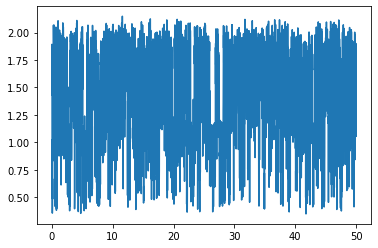

In [114]:
plt.plot(times.in_units_of(unit.nanoseconds), distances[:,0,0])
plt.show()

Or lets just get the distance between the geometric centers of all residues at the 3000-th frame:

In [115]:
list_groups_1 = msm.get(molecular_system, target="group", selection="all", atom_index=True)
distances = msm.distance(item_1=molecular_system, groups_of_atoms_1=list_groups_1, group_behavior_1="geometric_center",
                         frame_indices_1=3000)

In [116]:
distances.shape

(1, 7, 7)

In [117]:
print("The distance between geometric_center of group 2-th and group 4-th at frame 3000-th is: {}".format(distances[0,2,4]))

The distance between geometric_center of group 2-th and group 4-th at frame 3000-th is: 0.6818505282832528 nm


### Distance between atom groups of two systems

The method `molsysmt.distance()` can work with two different systems as it was shown in the section about getting distances from atoms. The same option works for atom groups. Lets just see this with a case:

In [99]:
molecular_system = msm.convert('mmtf:1TCD', 'molsysmt.MolSys')

In [100]:
molecular_system_A = msm.extract(molecular_system, selection="chain.index==0 and molecule.type=='protein'")
molecular_system_B = msm.extract(molecular_system, selection="chain.index==1 and molecule.type=='protein'")

In [101]:
msm.info(molecular_system_A)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n proteins,n frames
molsysmt.MolSys,1906,248,1,1,1,1,1,1


In [102]:
msm.info(molecular_system_B)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n proteins,n frames
molsysmt.MolSys,1912,249,1,1,1,1,1,1


Distance between groups belonging to different groups can be computed. All input arguments introduced to work with atoms remain valid in this context:

In [103]:
list_groups_A = msm.get(molecular_system_A, target="group", selection="group.index in [0,1,2,3]", atom_index=True)
list_groups_B = msm.get(molecular_system_B, target="group", selection="group.index in [10,11,12,13]", atom_index=True)

In [104]:
distances = msm.distance(item_1=molecular_system_A, groups_of_atoms_1=list_groups_A, group_behavior_1="geometric_center",
                         item_2=molecular_system_B, groups_of_atoms_2=list_groups_B, group_behavior_2="geometric_center")

In [105]:
distances.shape

(1, 4, 4)

In [106]:
print("The distance between geometric_center of group 0-th of A and group 10-th of B is: {}".format(distances[0,0,0]))

The distance between geometric_center of group 0-th of A and group 10-th of B is: 4.5790732402700085 nm


### Distances between atom groups positions in different frames

The method `molsysmt.distance()` works with atom groups just like with only atoms. There are two input arguments to select the coordinates of a set of atoms at two different frames:

In [118]:
molecular_system = msm.convert('pentalanine.h5', to_form='molsysmt.MolSys')

In [119]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,5000


Let see how `frame_indices_1` and `frame_indices_2` works in this context:

In [120]:
distances = msm.distance(item_1=molecular_system,
                         selection_1="group.index==0", group_behavior_1="geometric_center", frame_indices_1=100,
                         selection_2="group.index==6", group_behavior_2="geometric_center", frame_indices_2=200)

In [122]:
distances.shape

(1, 1, 1)

The physical meaning of this former example is clear but not really useful, unless `selection_1` is the same as `selection_2` as we can see in the following section.

### Displacement distances of atom groups

The possibility to get the distance between the coordinates of an object at two different frames makes the obtention of atom groups displacements straightforward. Lets plot the distance walked by the 0-th group of the former pentalanine peptide between consecutive frames of the trajectory store in `pentalanine.h5`:

In [123]:
molecular_system = msm.convert('pentalanine.h5', to_form='molsysmt.MolSys')

In [125]:
n_frames = msm.get(molecular_system, n_frames=True)

In [127]:
all_frame_indices = np.arange(n_frames)

In [128]:
displacements = msm.distance(item_1=molecular_system, selection_1="group.index==0", group_behavior_1="geometric_center",
                             frame_indices_1=all_frame_indices[:-1], frame_indices_2=all_frame_indices[1:])

In [130]:
time = msm.get(molecular_system, target='system', frame_indices=all_frame_indices[:-1], time=True)

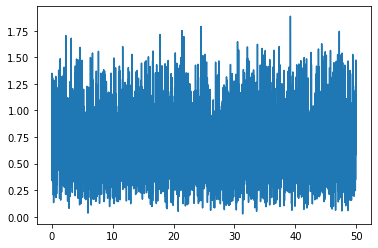

In [132]:
plt.plot(time.in_units_of(unit.nanoseconds), displacements[:,0,0])
plt.show()

Or we can, for instance, get the distance of the center of mass of the whole molecule from the initial configuration to every time step along the trajectory:

In [138]:
displacements = msm.distance(item_1=molecular_system, selection_1="all",
                             frame_indices_1=np.zeros(n_frames), frame_indices_2=all_frame_indices)

In [139]:
time = msm.get(molecular_system, target='system', time=True)

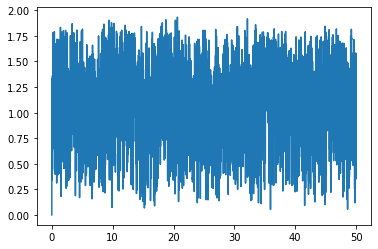

In [140]:
plt.plot(time.in_units_of(unit.nanoseconds), displacements[:,0,0])
plt.show()

### Distance between atom groups pairs

Lets see the following example where all distances betweeen the geometric center of the residues of pentalanine is computed along a short trajectory:

In [141]:
molecular_system = msm.convert('pentalanine.h5', to_form='molsysmt.MolSys')

In [142]:
list_atom_groups = msm.get(molecular_system, target='group', selection='all', atom_index=True)

In [143]:
list_atom_groups

array([array([0, 1, 2, 3, 4, 5]),
       array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
       array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
       array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
       array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
       array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55]),
       array([56, 57, 58, 59, 60, 61])], dtype=object)

In [144]:
distances = msm.distance(molecular_system, groups_of_atoms_1=list_atom_groups, group_behavior_1='geometric_center')

In [145]:
distances.shape

(5000, 7, 7)

The method worked needlessly computing the distances between different groups twice, as well as getting the distance between a geometric center to the its self for every residue. This can be avoided thanks to the input argument `pairs=True`. Using `pairs=True`, as it can be seen in the corresponding section about distances of atoms pairs, the distances between atom groups pairs made by consecutive elements of two zipped lists are obtained. Lets see this with a pratical case:

In [155]:
from itertools import combinations 

list_atom_groups_1=[]
list_atom_groups_2=[]
aux_list_1=[]
aux_list_2=[]

for ii,jj in combinations(range(7), 2):
    print('{}.vs.{}'.format(ii,jj))
    aux_list_1.append(ii)
    aux_list_2.append(jj)
    list_atom_groups_1.append(list_atom_groups[ii])
    list_atom_groups_2.append(list_atom_groups[jj])

0.vs.1
0.vs.2
0.vs.3
0.vs.4
0.vs.5
0.vs.6
1.vs.2
1.vs.3
1.vs.4
1.vs.5
1.vs.6
2.vs.3
2.vs.4
2.vs.5
2.vs.6
3.vs.4
3.vs.5
3.vs.6
4.vs.5
4.vs.6
5.vs.6


In [157]:
distances = msm.distance(molecular_system, groups_of_atoms_1=list_atom_groups_1, group_behavior_1='geometric_center',
                        groups_of_atoms_2=list_atom_groups_2, group_behavior_2='geometric_center', pairs=True)

In [158]:
distances.shape

(5000, 21)

Lets plot the distance of a given pair, 12-th p.e., defined by the groups:

In [161]:
print('The 12-th pair is made by groups {}-th and {}-th, and its distance along the trajectory is:'.format(aux_list_1[12], aux_list_2[12]))

The 12-th pair is made by groups 2-th and 4-th, and its distance along the trajectory is:


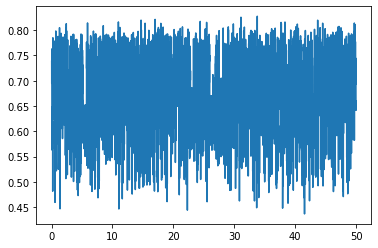

In [165]:
time = msm.get(molecular_system, target='system', time=True)
plt.plot(time.in_units_of(unit.nanoseconds), distances[:,12])
plt.show()

### Minimum and Maximum distance of atom groups

Sometimes the pair of atom groups with the shortest distance between their geometric centers, or centers of mass, needs to be determined. Lets work to illustrate this case with a dimeric protein complex:

In [169]:
molecular_system = msm.convert('mmtf:1TCD', 'molsysmt.MolSys')

In [171]:
msm.info(molecular_system, target='component', selection='molecule.type=="protein"')

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,1906,248,0,0,protein,0,TRIOSEPHOSPHATE ISOMERASE
1,1912,249,1,0,protein,0,TRIOSEPHOSPHATE ISOMERASE


Lets find out the closest pairs of distance from different components:

In [172]:
atoms_groups_component_0 = msm.get(molecular_system, target='group', selection='component.index==0', atom_index=True)
atoms_groups_component_1 = msm.get(molecular_system, target='group', selection='component.index==1', atom_index=True)

In [173]:
min_pairs, min_distances = msm.minimum_distance(molecular_system,
                                                groups_of_atoms_1=atoms_groups_component_0, group_behavior_1='geometric_center',
                                                groups_of_atoms_2=atoms_groups_component_1, group_behavior_2='geometric_center')

There is a single frame in our molecular system, thats why the shape of the numpy array with the pair of groups is the following:

In [175]:
min_pairs.shape

(1, 2)

Where the indices found in min_pairs correspond to the n-th and m-th atoms group of the first list and the second list respectively:

In [176]:
min_pairs[0]

array([69, 12])

In [178]:
group_index_in_component_0 = msm.get(molecular_system, target='group', selection='component.index==0', index=True)[69]
group_index_in_component_1 = msm.get(molecular_system, target='group', selection='component.index==1', index=True)[12]

In [179]:
msm.info(molecular_system, target='group', indices=[group_index_in_component_0, group_index_in_component_1])

index,id,name,type,n atoms,component index,chain index,molecule index,molecule type,entity index,entity name
69,73,GLY,aminoacid,4,0,0,0,protein,0,TRIOSEPHOSPHATE ISOMERASE
260,15,CYS,aminoacid,6,1,1,0,protein,0,TRIOSEPHOSPHATE ISOMERASE


And the corresponding minimum distance between both residues from the two components is:

In [181]:
min_distances[0]

Quantity(value=0.38221311908773786, unit=nanometer)

On the other hand, if the maximum distance needs to be obtained, the method to be used is `molsysmt.maximum_distance()`. Lets show how this method works with a short trajectory of the pentalanine peptide.

In [182]:
molecular_system = msm.convert('pentalanine.h5', to_form='molsysmt.MolSys')

In [183]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,5000


The trajectory has 5000 frames. Lets see, for each frame, whats the pair of residues with the longest distance between their geometric centers:

In [184]:
list_atom_groups = msm.get(molecular_system, target='group', selection='all', atom_index=True)
max_pairs, max_distances = msm.maximum_distance(molecular_system, groups_of_atoms_1=list_atom_groups,
                                                group_behavior_1='geometric_center')

This time we have 5000 pairs of group, one for each frame; and 5000 maximum distances:

In [190]:
max_pairs.shape

(5000, 2)

In [191]:
max_pairs

array([[0, 6],
       [0, 6],
       [0, 6],
       ...,
       [0, 6],
       [2, 6],
       [2, 6]])

In [192]:
max_distances

Quantity(value=array([1.42980221, 1.50600047, 1.6863101 , ..., 1.83006115, 1.24581543,
       1.39260625]), unit=nanometer)

To give a last example on this methods, lets wonder: what is the residue of the peptide with the largest displacement between each frame and the next one? (at each frame, of course)

In [199]:
list_atom_groups = msm.get(molecular_system, target='group', selection='all', atom_index=True)
frames=np.arange(msm.get(molecular_system, n_frames=True))
max_group, max_distances = msm.maximum_distance(molecular_system,
                                                groups_of_atoms_1=list_atom_groups, group_behavior_1='geometric_center',
                                                groups_of_atoms_2=list_atom_groups, group_behavior_2='geometric_center',
                                                frame_indices_1=frames[:-1], frame_indices_2=frames[1:],
                                                pairs=True)

Since we are using the option `pairs=True`, the output this time corresponds to the index of the pair made by the elements in both `groups_of_atoms_1` and `groups_of_atoms_2` with the maximum distance, or displacement in this case, for each i-th frame with the consecutive (i+1)-th frame:

In [200]:
max_group.shape

(4999,)

In [201]:
max_group

array([2, 0, 6, ..., 6, 6, 6])

And the value of this maximum displacements are:

In [205]:
max_distances

Quantity(value=array([0.72087604, 1.2344545 , 0.83900167, ..., 1.31317032, 0.88887944,
       1.26066073]), unit=nanometer)

This way:

In [209]:
print('The {}-th is the group with the maximum displacement between frames 200-th and 201-th: {}'.format(max_group[200], max_distances[200]))

The 3-th is the group with the maximum displacement between frames 200-th and 201-th: 0.6367210108091421 nm


## Neighbor lists

### Neighbor atoms lists

Los atomos vecinos pueden serlo de otros átomos, de una coordenada espacial,  o de por ejemplo un centro de uno o varios grupos de átomos.

### Neighbor atom groups lists

## Contact maps

### Contact maps from atoms

### Contact maps from atom groups